In [1]:
import pandas as pd
import scipy
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from itertools import islice

from JC_functions import *
from JC_momenst import *
from utils import extract_contour_from_mask, ensure_ccw



folder_path = r"D:\_WPI\PAPER_4\data\MPEG400-Original"
png_files = glob(os.path.join(folder_path, "*.jpg"))
contours = []
for file in png_files:
    try:
        contour = extract_contour_from_mask(file)
        contours.append(contour)
    except ValueError as e:
        print(e)
contours = ensure_ccw(contours)
labels = np.repeat(np.arange(20), 20)
N= len(contours)

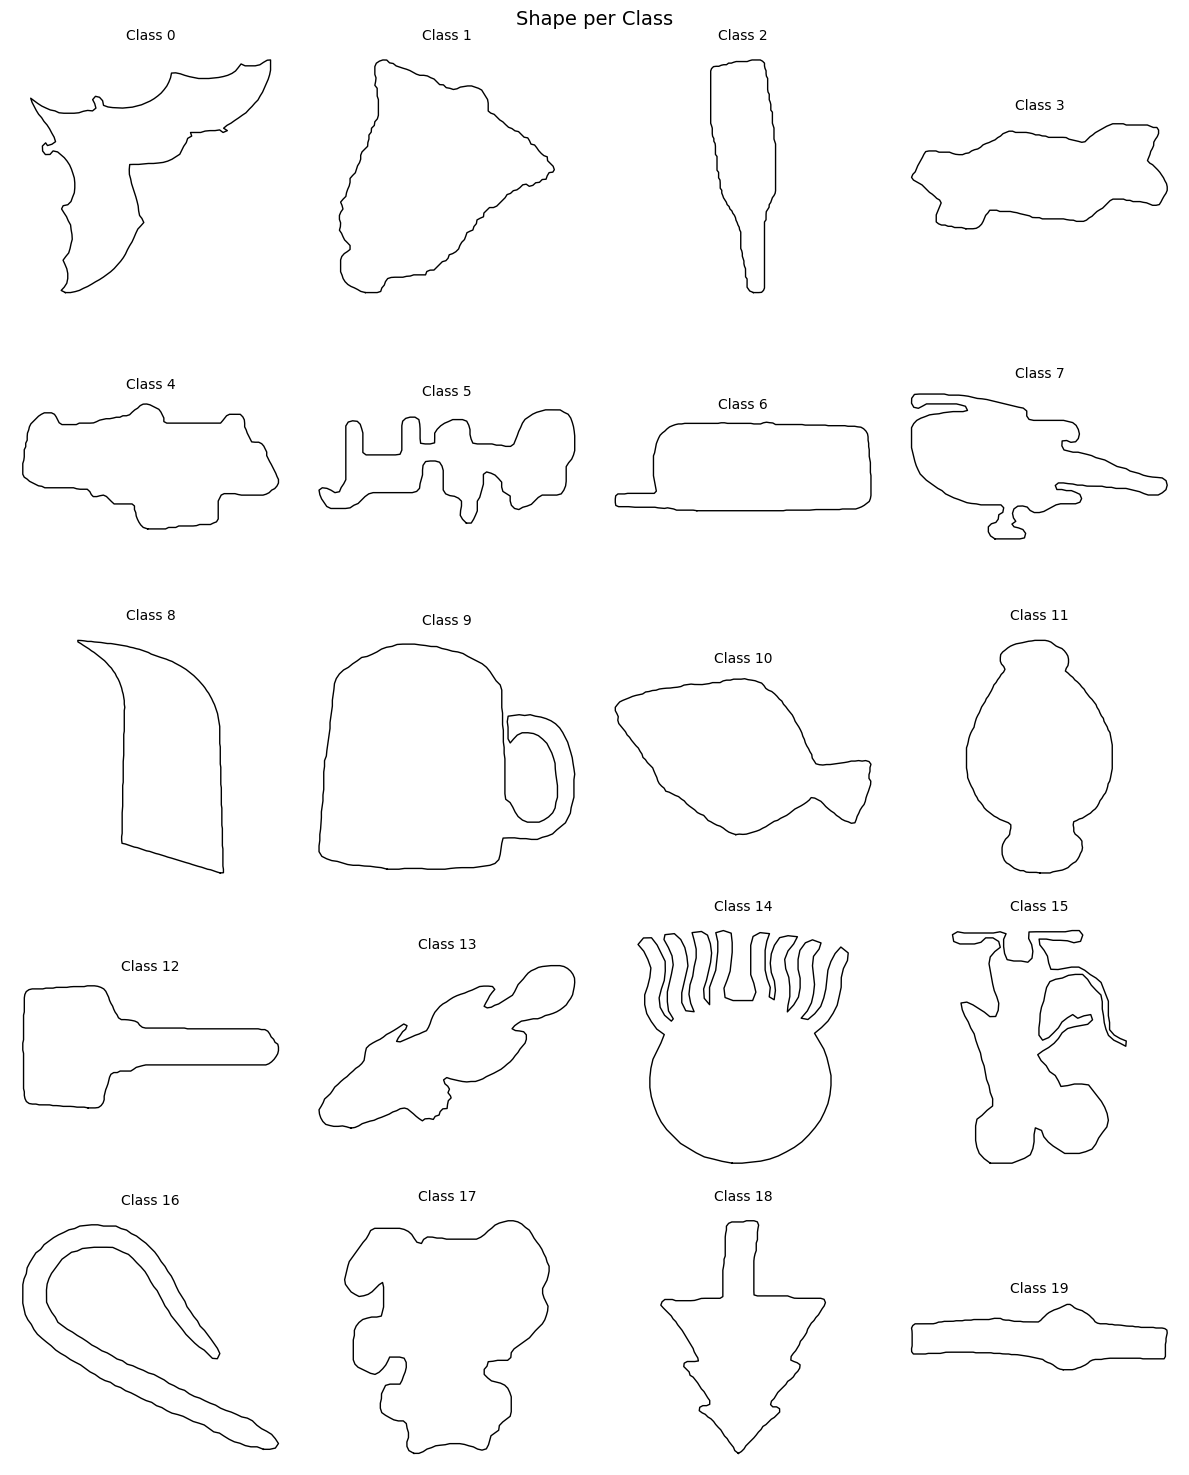

In [2]:
complex_contours = np.array([Normalize(shape_to_complex(reparametrize_by_arc_length(contours[i], 200, False)[1][:-1])) for i in range(N)])

shape_per_class = one_polygon_per_class(complex_contours, labels)

classes = sorted(shape_per_class.keys())
n_classes = len(classes)

# ---- Create grid dynamically ----
ncols = 4
nrows = int(np.ceil(n_classes / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(3 * ncols, 3 * nrows))
axes = np.atleast_1d(axes).ravel()

# ---- Plot ----
for ax, lab in zip(axes, classes):
    plot_polygon(ax, shape_per_class[lab], color="black", lw=1)
    ax.set_title(f"Class {lab}", fontsize=10)

# ---- Remove unused axes ----
for ax in islice(axes, n_classes, None):
    ax.remove()

plt.suptitle("Shape per Class", fontsize=14)
plt.tight_layout()
plt.show()


In [3]:
feature_dicts = [features_13(remove_duplicate_vertices(leaf)) for leaf in complex_contours]

feature_names = list(feature_dicts[0].keys())
X_real = np.array([
    [fd[name].real if np.iscomplexobj(fd[name]) else fd[name]
     for name in feature_names]
    for fd in feature_dicts
], dtype=float)

X_imag = np.array([
    [fd[name].imag if np.iscomplexobj(fd[name]) else 0.0
     for name in feature_names]
    for fd in feature_dicts
], dtype=float)

X = np.concatenate([X_real, X_imag], axis=1)

The moment m_{0,3,1} is not in the cache. Computing it now. 
Add it in the manually to the list of moments to compute if you want to avoid this in the future.
The moment m_{0,5,1} is not in the cache. Computing it now. 
Add it in the manually to the list of moments to compute if you want to avoid this in the future.
The moment m_{3,2,1} is not in the cache. Computing it now. 
Add it in the manually to the list of moments to compute if you want to avoid this in the future.
The moment m_{2,3,1} is not in the cache. Computing it now. 
Add it in the manually to the list of moments to compute if you want to avoid this in the future.
The moment m_{0,3,1} is not in the cache. Computing it now. 
Add it in the manually to the list of moments to compute if you want to avoid this in the future.
The moment m_{0,5,1} is not in the cache. Computing it now. 
Add it in the manually to the list of moments to compute if you want to avoid this in the future.
The moment m_{3,2,1} is not in the cache. Comp

Dimension of ambient space: 26,
Estimated global dimension: 10,
The estimated dimensions per class are: [5 5 5 6 6 5 5 6 6 5 6 6 6 4 5 6 5 6 6 4], 
Upper bound local dimension = 6, 
Centroids positions = [[ 3.30031657 -0.38753522]
 [-3.03735306 -0.15237434]
 [ 0.878971   -2.23684225]
 [-1.95363884 -0.63215679]
 [-1.92180473 -0.28873554]
 [ 2.34574476  2.0597818 ]
 [-1.29944846 -1.00706989]
 [ 0.08388531 -2.50157363]
 [-1.98549322 -0.23336685]
 [-1.53888956  2.41720884]
 [-1.44852352 -0.66881222]
 [-2.58189081  0.31267177]
 [ 2.46569934 -0.68232768]
 [ 0.49074365 -2.11787854]
 [-1.29276517  1.83106027]
 [ 1.02239735  3.07943498]
 [ 5.92929166  1.73391432]
 [-2.51154897  1.08955237]
 [-1.97874369 -1.79609315]
 [ 2.24945002 -3.62004079]]


C:\Users\LONGA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\LONGA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_mds.py:744: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9. To suppress this warning, provide some value of `n_init`.
  warnings.warn(
C:\Users\LONGA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_mds.py:754: FutureWarning: The default value of `init` will change from 'random' to 'classical_mds' in 1.10. To suppress this warning, provide some value of `init`.
  warnings.warn(


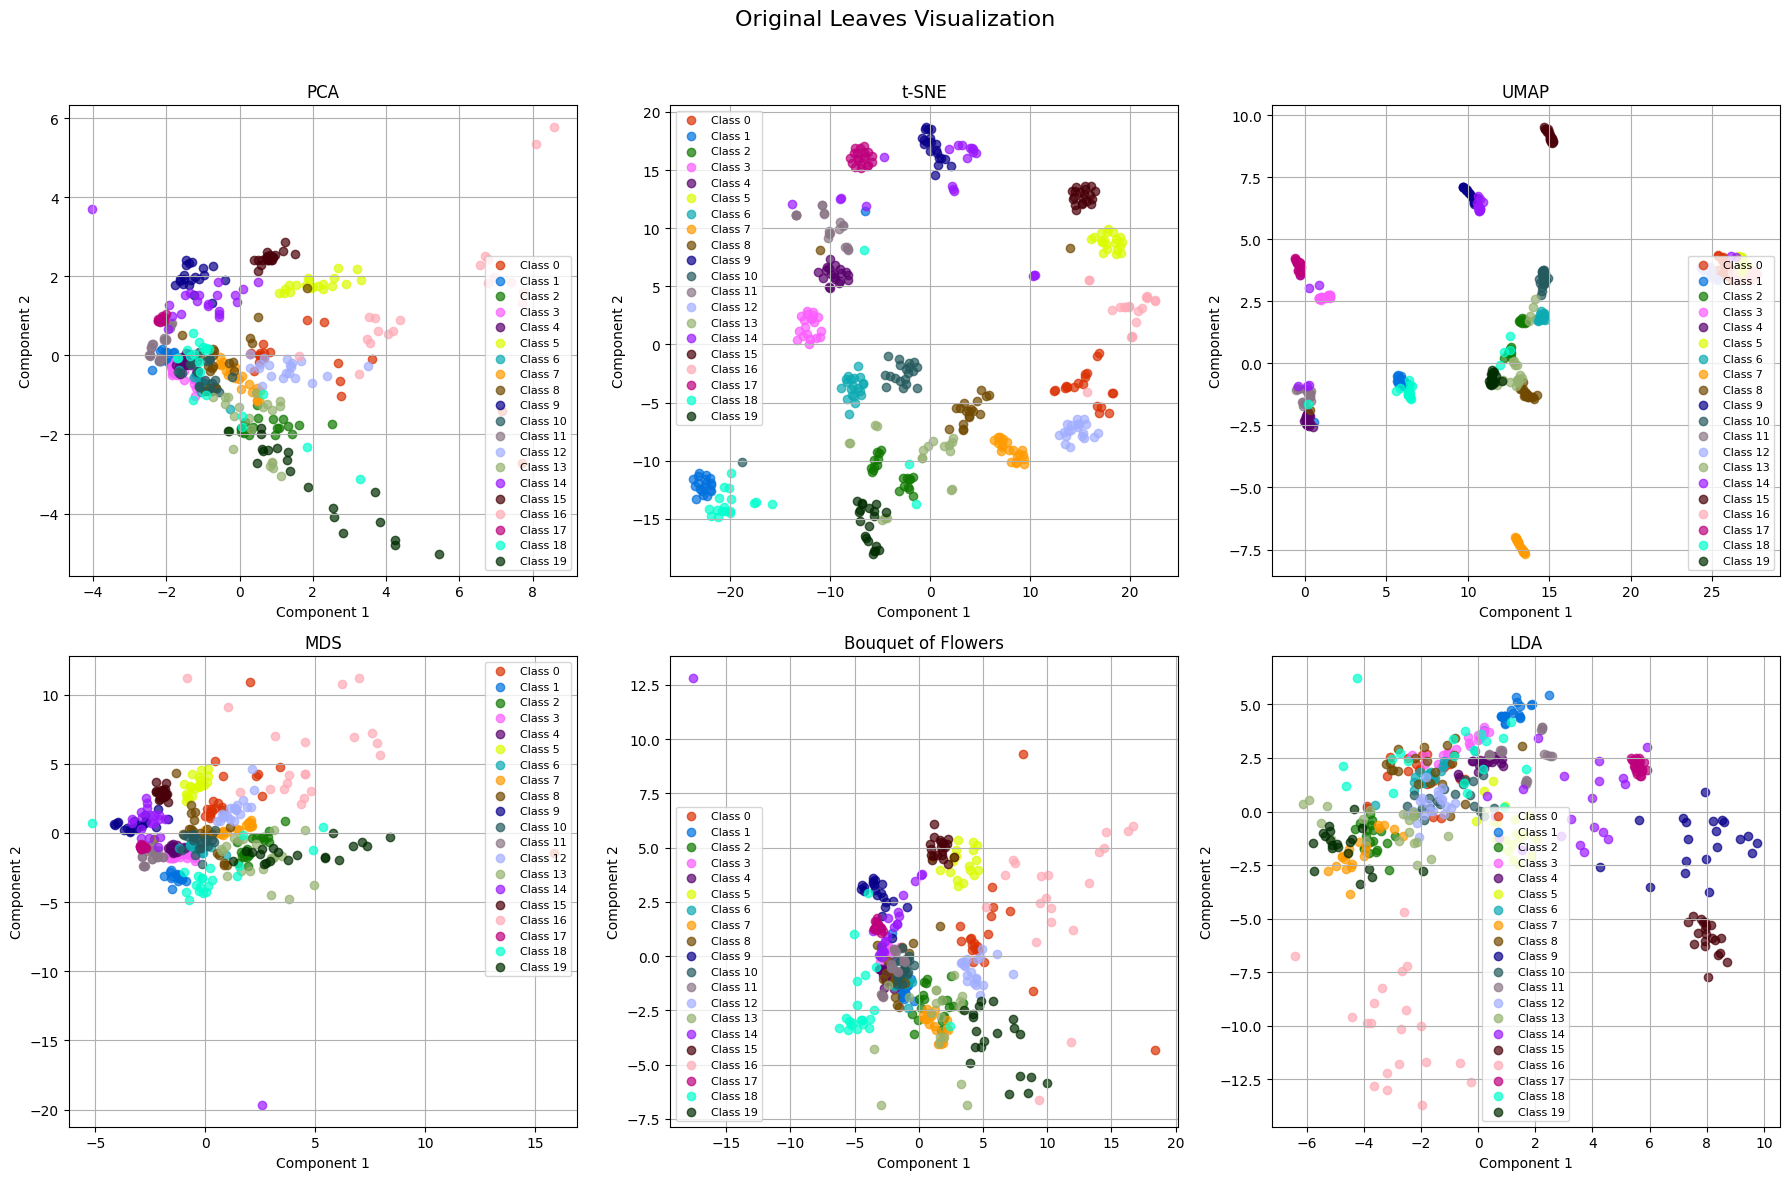

In [4]:
labels = np.asarray(labels).astype(int)
plot_2D(X, labels)

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

RF_classifier(X_scaled, labels)


Test accuracy: 0.9600

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         5
           7       0.83      1.00      0.91         5
           8       1.00      1.00      1.00         5
           9       0.83      1.00      0.91         5
          10       1.00      0.80      0.89         5
          11       0.83      1.00      0.91         5
          12       1.00      0.80      0.89         5
          13       1.00      1.00      1.00         5
          14       1.00      0.60      0.75         5
          15       1.00      1.00      1.00         5
          16       1.00      1.00  